In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import NMF
from numpy.linalg import svd


In [2]:
records = []
with open('data/bigfoot_first100records.json') as f:
    for i in f:
        records.append(json.loads(i))

In [3]:
df = pd.read_csv('data/cleaned_bigfood_data.csv', index_col=0)

In [4]:
df = df.drop(['NOTES', 'UPDATE', 'FORGET SASQUATCH', 'NOTE', 'PROVINCE', 'COUNTRY'], axis=1)

In [5]:
to_drop = df[df.OBSERVED.isna()].index 
df = df.drop(labels = to_drop, axis=0)

In [6]:
names = []
groups = []
for name, group in df.groupby('STATE'):
    names.append(name)
    groups.append(group)



In [7]:
df.ENVIRONMENT.fillna('the', inplace=True)

In [8]:
state_obs = dict()
state_env = dict()
for state in names:
    tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
    obs =  df[df.STATE == state].OBSERVED
    env = df[df.STATE == state].ENVIRONMENT    
    observations = tfidf.fit_transform(obs).toarray()
    environment = tfidf.fit_transform(env).toarray()
    state_obs[state] = observations
    state_env[state] = environment

    

In [9]:
for state in state_obs.keys():

list(state_obs.keys())

IndentationError: expected an indented block (<ipython-input-9-9173775308bd>, line 3)

In [10]:
state_env;

In [189]:
for k, v in state_obs.items():
    print(f'{k}: {len(v)}')

 Alabama: 89
 Alaska: 20
 Arizona: 83
 Arkansas: 87
 California: 392
 Colorado: 118
 Connecticut: 11
 Delaware: 5
 Florida: 280
 Georgia: 116
 Idaho: 64
 Illinois: 219
 Indiana: 75
 Iowa: 49
 Kansas: 39
 Kentucky: 108
 Louisiana: 39
 Maine: 10
 Maryland: 34
 Massachusetts: 26
 Michigan: 200
 Minnesota: 66
 Mississippi: 20
 Missouri: 129
 Montana: 43
 Nebraska: 14
 Nevada: 7
 New Hampshire: 11
 New Jersey: 59
 New Mexico: 40
 New York: 96
 North Carolina: 79
 North Dakota: 4
 Ohio: 250
 Oklahoma: 81
 Oregon: 236
 Pennsylvania: 107
 Rhode Island: 5
 South Carolina: 38
 South Dakota: 11
 Tennessee: 88
 Texas: 200
 Utah: 56
 Vermont: 8
 Virginia: 72
 Washington: 526
 West Virginia: 98
 Wisconsin: 74
 Wyoming: 27


In [190]:
for k, v in state_env.items():
    print(f'{k}: {len(v)}')

 Alabama: 89
 Alaska: 20
 Arizona: 83
 Arkansas: 87
 California: 392
 Colorado: 118
 Connecticut: 11
 Delaware: 5
 Florida: 280
 Georgia: 116
 Idaho: 64
 Illinois: 219
 Indiana: 75
 Iowa: 49
 Kansas: 39
 Kentucky: 108
 Louisiana: 39
 Maine: 10
 Maryland: 34
 Massachusetts: 26
 Michigan: 200
 Minnesota: 66
 Mississippi: 20
 Missouri: 129
 Montana: 43
 Nebraska: 14
 Nevada: 7
 New Hampshire: 11
 New Jersey: 59
 New Mexico: 40
 New York: 96
 North Carolina: 79
 North Dakota: 4
 Ohio: 250
 Oklahoma: 81
 Oregon: 236
 Pennsylvania: 107
 Rhode Island: 5
 South Carolina: 38
 South Dakota: 11
 Tennessee: 88
 Texas: 200
 Utah: 56
 Vermont: 8
 Virginia: 72
 Washington: 526
 West Virginia: 98
 Wisconsin: 74
 Wyoming: 27


In [12]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
observations = tfidf.fit_transform(df['OBSERVED']).toarray()

In [13]:
observations

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
def latent_topics(H, vocabulary):
    '''
    Print the most influential words of each latent topic, and prompt the user
    to label each topic. The user should use their humanness to figure out what
    each latent topic is capturing.
    '''
    hand_labels = []
    for idx, row in enumerate(H):
        top_five = np.argsort(row)[::-1][:20]
        print('topic', idx)
        print('-->', ' '.join(np.array(vocab)[top_five]))
        print()

In [49]:

from sklearn.decomposition import NMF

factorizer = NMF(n_components=4, verbose = 1)
W = factorizer.fit_transform(observations)
H = factorizer.components_


/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
violation: 1.0
violation: 0.6456496422189881
violation: 0.435950535475401
violation: 0.3374051581149615
violation: 0.27440429964178703
violation: 0.22647116357741934
violation: 0.18621226465506793
violation: 0.1542659596360006
violation: 0.12901541513501158
violation: 0.10853216963700706
violation: 0.09199701181705768
violation: 0.0785785735129195
violation: 0.06749333757414089
violation: 0.05848392046228764
violation: 0.05112304328127831
violation: 0.04507626177516069
violation: 0.04021837589732084
violation: 0.03629273883872678
violation: 0.03309070137596033
violation: 0.03054105183509031
violation: 0.028461762626009583
violation: 0.026682

In [50]:
latent_topics(H, vocab)

topic 0
--> road saw creature car driving tall hair feet looked dark large head just seen turned highway animal legs right arms

topic 1
--> heard sound like camp loud sounds night sounded tent scream area noise hear lake time minutes camping howl animal away

topic 2
--> tracks prints snow inches foot trail print track area footprints creek toes large size long pictures wide human footprint lake

topic 3
--> house said saw woods just like looked window told ran went thing know door dog dad time got seen looking



In [28]:
vocab = tfidf.get_feature_names()

In [41]:
def fit_nmf(r):
    nmf = NMF(n_components=r)
    nmf.fit(observations)
    return nmf.reconstruction_err_

In [38]:
from sklearn.decomposition import NMF



error = [fit_nmf(i) for i in range(1,5001,1000)]
plt.plot(range(1,6), error)
plt.xticks(range(1, 6))
plt.xlabel('r by 1000')
plt.ylabel('Reconstruction Error')

/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/libenhagos/home/libenhagos/downloads/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


KeyboardInterrupt: 

Text(0, 0.5, 'Reconstruction Error')

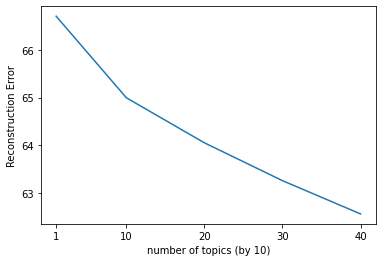

In [46]:
error_1 = error
plt.plot([1,10,20,30,40], error_1)
plt.xticks([1,10,20,30,40])
plt.xlabel('number of topics (by 10)')
plt.ylabel('Reconstruction Error')


In [39]:
reconstruction_err_

[66.70923966208117,
 64.99440365352724,
 64.0476373136885,
 63.25215874826573,
 62.55323913355584]

In [44]:
factorizer.reconstruction_err_

65.4531011911144